In [1]:
import os, re, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import xlrd

In [2]:
root = 'C:/Users/antho/Desktop/cabs'
cab_data = "Cab_Data"
city = "City"
cus_id= "Customer_ID"
tran_id = "Transaction_ID"
cab_df = pd.read_csv(os.path.join(root,(cab_data +".csv")))
city_df = pd.read_csv(os.path.join(root,(city + ".csv")))
cus_df = pd.read_csv(os.path.join(root,(cus_id + ".csv")))
tran_df = pd.read_csv(os.path.join(root,(tran_id + ".csv")))

# Merge Data to form a master dataset

In [3]:
data1=pd.merge(tran_df,cab_df,on='Transaction ID')
data2=pd.merge(data1,cus_df, on = 'Customer ID')
master_df=pd.merge(data2,city_df, on = 'City')
master_df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,Female,29,6829,"418,859","127,001"
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,Female,29,6829,"418,859","127,001"
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,"418,859","127,001"
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,Female,29,6829,"418,859","127,001"


In [4]:
print(master_df.shape)

(359392, 14)


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [6]:
master_df.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

# Convert Population and Users to the right data type

In [7]:
master_df.Population = master_df.Population.str.replace(',','').astype(float)
master_df.Users = master_df.Users.str.replace(',','').astype(float)

In [8]:
master_df["Date of Travel"] = master_df["Date of Travel"].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))

# Split the Date of Travel Column 

In [9]:
master_df['Year of Travel'] = master_df['Date of Travel'].dt.year
master_df['Month of Travel'] = master_df['Date of Travel'].dt.month
master_df['Day of Travel'] = master_df['Date of Travel'].dt.day

master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

master_st=master_df.set_index('Date of Travel')
master_st.sort_values('Date of Travel').head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-02,10000429,57474,Card,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,Male,34,16558,248968.0,80021.0,2016,1,2,137.1860
2016-01-02,10000525,4551,Cash,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,Male,19,6316,1955130.0,164468.0,2016,1,2,25.0484
2016-01-02,10001234,38146,Cash,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,Male,36,6577,671238.0,25063.0,2016,1,2,577.9420
2016-01-02,10001311,53048,Card,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,Male,23,31566,418859.0,127001.0,2016,1,2,233.9280
2016-01-02,10000927,1808,Cash,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,Male,59,18999,8405837.0,302149.0,2016,1,2,635.8876


# Check for outliers

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

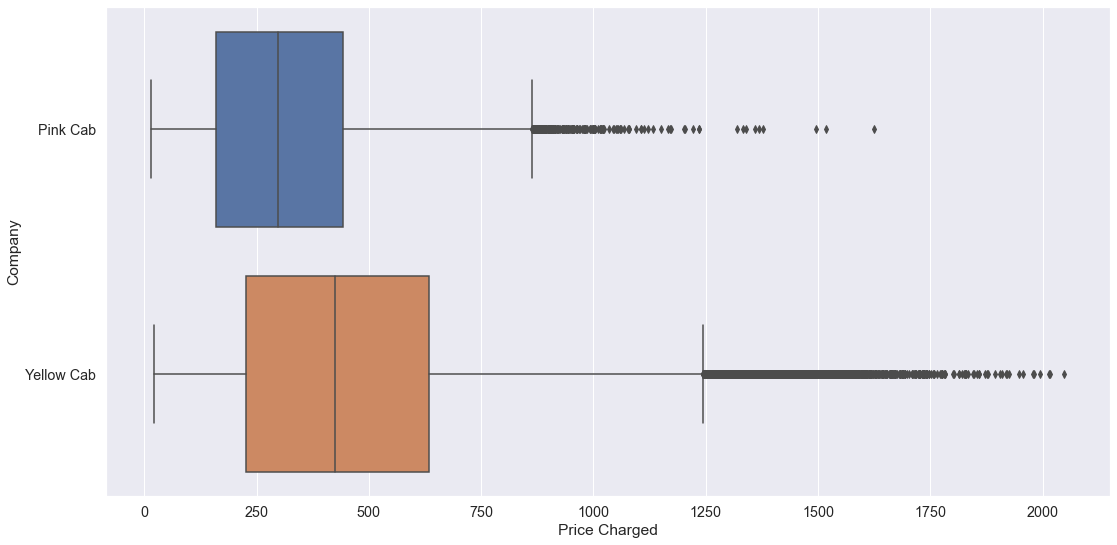

In [10]:
plt.figure(figsize=(18,9))

sns.set(font_scale = 1.3)
sns.boxplot(data = master_df, y = 'Company', x = "Price Charged", dodge=False)

In [11]:
round(master_df.describe(include='all',datetime_is_numeric=True),2)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
count,359392.00,359392.00,359392,359392,359392,359392,359392.00,359392.00,359392.00,359392,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
unique,NaN,NaN,2,NaN,2,19,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Card,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,215504,NaN,274681,99885,NaN,NaN,NaN,205912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,19191.65,NaN,2017-08-17 01:37:55.042293504,NaN,NaN,22.57,423.44,286.19,NaN,35.34,15048.82,3132198.04,158365.58,2017.05,7.50,15.63,137.25
min,10000011.00,1.00,NaN,2016-01-02 00:00:00,NaN,NaN,1.90,15.60,19.00,NaN,18.00,2000.00,248968.00,3643.00,2016.00,1.00,1.00,-220.06
25%,10110809.75,2705.00,NaN,2016-11-23 00:00:00,NaN,NaN,12.00,206.44,151.20,NaN,25.00,8424.00,671238.00,80021.00,2016.00,5.00,8.00,28.01
50%,10221035.50,7459.00,NaN,2017-09-10 00:00:00,NaN,NaN,22.44,386.36,282.48,NaN,33.00,14685.00,1595037.00,144132.00,2017.00,8.00,16.00,81.96
75%,10330937.25,36078.00,NaN,2018-05-12 00:00:00,NaN,NaN,32.96,583.66,413.68,NaN,42.00,21035.00,8405837.00,302149.00,2018.00,10.00,23.00,190.03
max,10440107.00,60000.00,NaN,2018-12-31 00:00:00,NaN,NaN,48.00,2048.03,691.20,NaN,65.00,35000.00,8405837.00,302149.00,2018.00,12.00,31.00,1463.97


# Feature Distribution

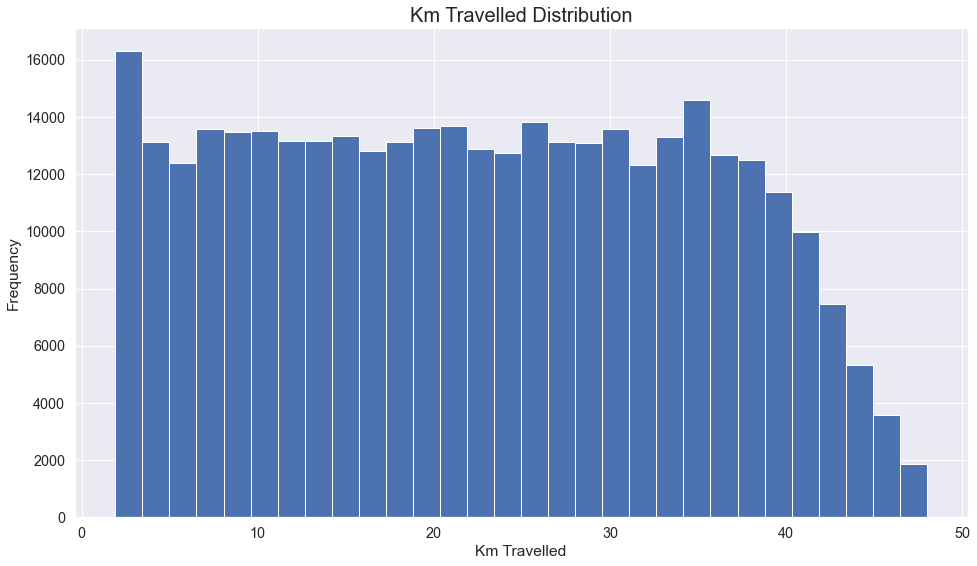

In [12]:
plt.figure(figsize = (16, 9))
plt.hist(master_df['KM Travelled'], bins = 30)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

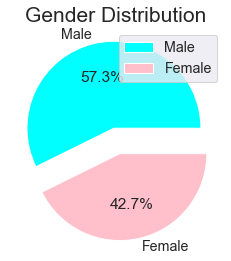

In [13]:
colors = ["cyan","pink"]
data_gender = master_df.Gender.value_counts().reset_index()
data_gender = data_gender.rename(columns={'index':'Gender','Gender':'Count'})
plt.pie(data_gender['Count'],labels=['Male','Female'],explode = [.1,.2], autopct='%1.1f%%',colors=colors);
plt.title("Gender Distribution",fontsize=21)
plt.legend()

Text(0.5, 0, 'Payment Mode')

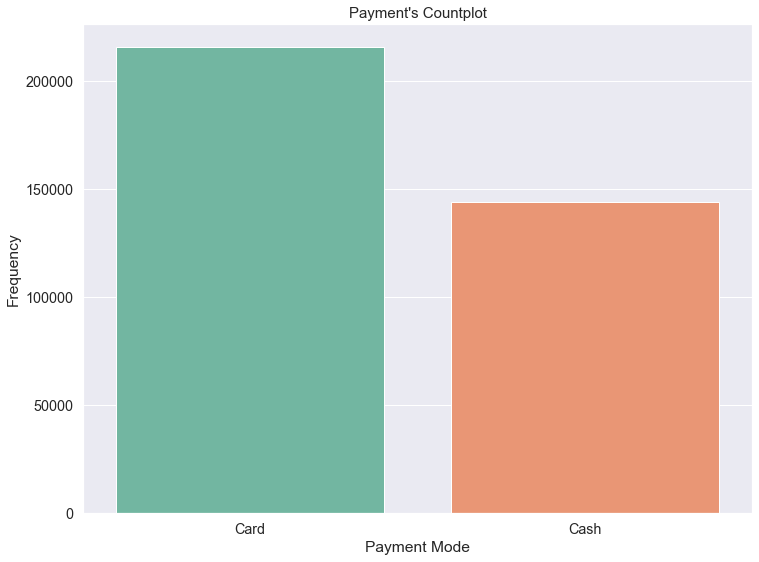

In [14]:
plt.figure(figsize=(12,9))
sns.countplot(data=master_df, x="Payment_Mode", palette='Set2')
plt.title("Payment Distribution", fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

Text(0.5, 0, 'Age')

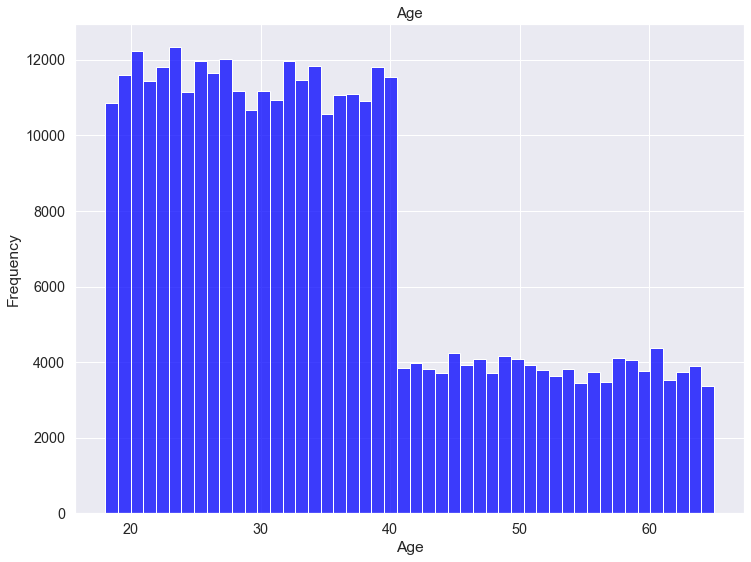

In [15]:
plt.figure(figsize=(12,9))
sns.histplot(data= master_df,x="Age",bins=48 , color= 'blue')
plt.title('Age Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Age')

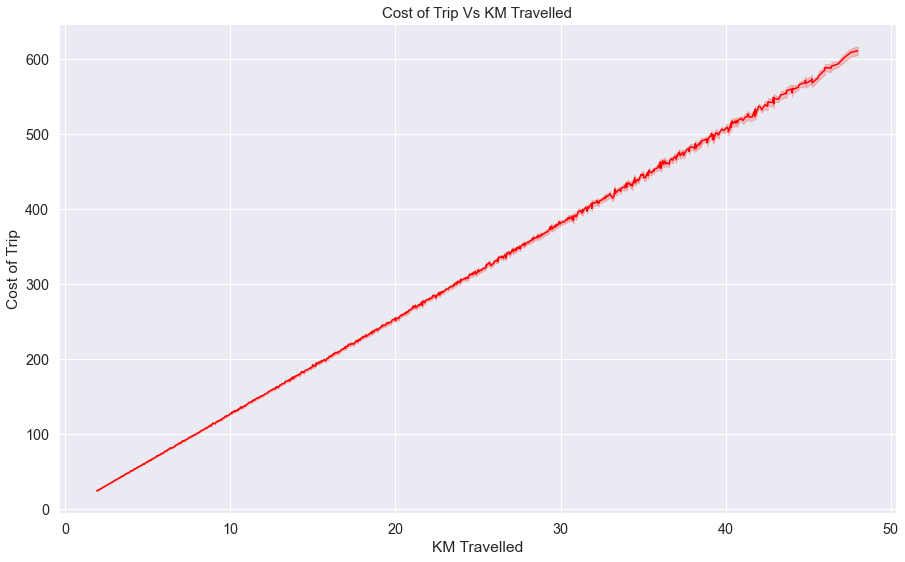

In [16]:
plt.figure(figsize=(15,9))
sns.lineplot(data=master_df, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip Vs KM Travelled', fontsize=15)
plt.xlabel('KM Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Text(0.5, 0, 'Cost of Trip')

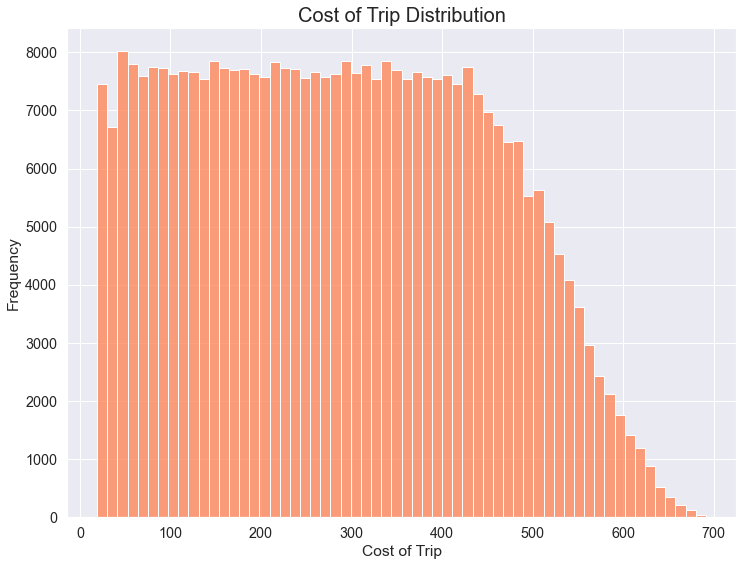

In [17]:
plt.figure(figsize=(12,9))
sns.histplot(data= master_df,x="Cost of Trip",bins=60 , color= 'coral')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Price Charged')

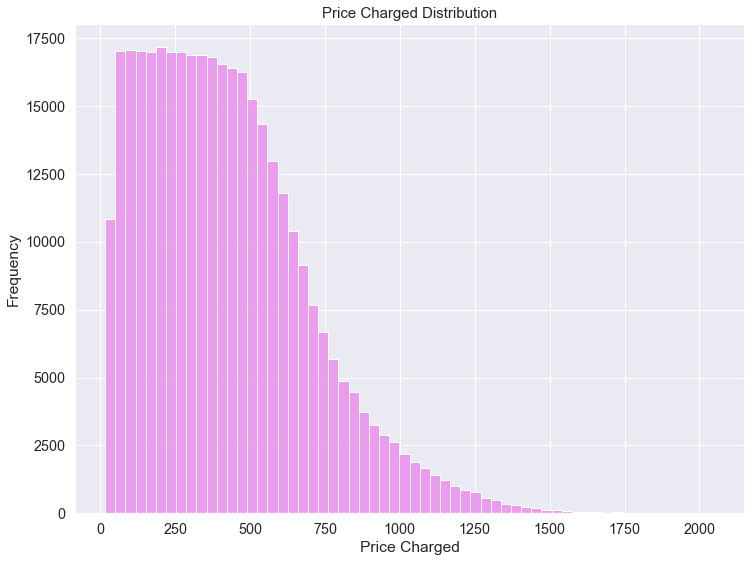

In [18]:
plt.figure(figsize=(12,9))
sns.histplot(data=master_df, x="Price Charged",bins=60 , color= 'violet')
plt.title('Price Charged Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Income (USD/Month)')

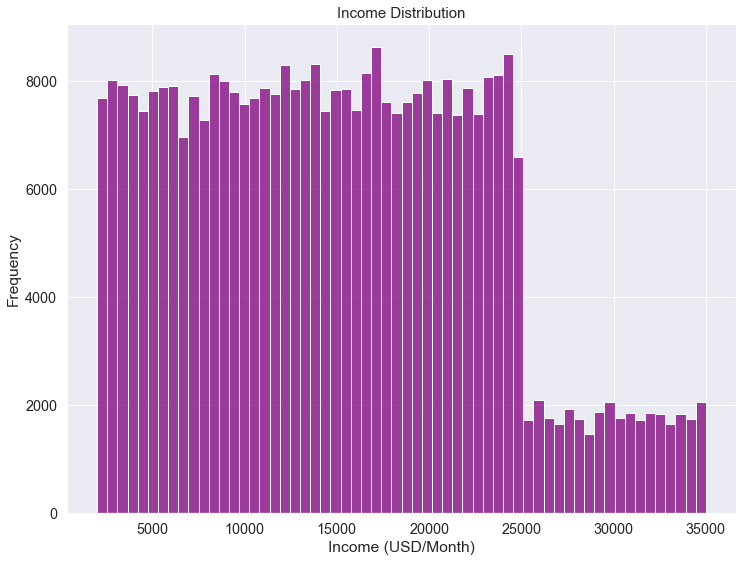

In [19]:
master_df.rename(columns={'Income (USD/Month)': 'Income'}, inplace = True)
plt.figure(figsize=(12,9))
sns.histplot(data=master_df, x="Income",bins=60 , color= 'purple')
plt.title('Income Distribution', fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Income (USD/Month)')

# Unique cities in Data set

In [20]:
master_df.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

# Calculating Profit

In [21]:
master_df["Profit"] = master_df["Price Charged"] - master_df["Cost of Trip"]

In [22]:
master_df['Profit'].groupby([master_df['Company']]).mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

In [23]:
master_df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

# Create different data set for Yellow and Pink Cab

In [24]:
yellow_cab_st= master_st[master_st.Company.isin(['Yellow Cab'])]
print(yellow_cab_st.shape)
yellow_cab_st.head()

(274681, 17)


,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2018-07-21,10351127,29290,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,814885.0,24701.0,2018,7,21,281.2772
2018-11-23,10412921,29290,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,814885.0,24701.0,2018,11,23,194.6480
2018-04-21,10320494,27703,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,814885.0,24701.0,2018,4,21,253.9808
2018-05-04,10324737,27703,Cash,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,814885.0,24701.0,2018,5,4,50.8912
2016-09-21,10079404,28712,Card,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,814885.0,24701.0,2016,9,21,210.0920


In [25]:
yellow_cab= master_df[master_df.Company.isin(['Yellow Cab'])]
print(yellow_cab.shape)
yellow_cab.head()

(274681, 18)


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income,Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,814885.0,24701.0,2018,7,21,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,814885.0,24701.0,2018,11,23,194.6480
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,814885.0,24701.0,2018,4,21,253.9808
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,814885.0,24701.0,2018,5,4,50.8912
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,814885.0,24701.0,2016,9,21,210.0920


In [26]:
pink_cab_st= master_st[master_st.Company.isin(['Pink Cab'])]
print(pink_cab_st.shape)
pink_cab_st.head()

(84711, 17)


,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-08,10000011,29290,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,814885.0,24701.0,2016,1,8,57.315
2016-01-06,10000012,27703,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,814885.0,24701.0,2016,1,6,23.666
2018-10-27,10395626,27703,Card,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,814885.0,24701.0,2018,10,27,25.096
2016-01-02,10000013,28712,Cash,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,814885.0,24701.0,2016,1,2,27.568
2016-01-07,10000014,28020,Cash,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,814885.0,24701.0,2016,1,7,25.798


In [27]:
pink_cab= master_df[master_df.Company.isin(['Yellow Cab'])]
print(pink_cab.shape)
pink_cab.head()

(274681, 18)


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income,Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,814885.0,24701.0,2018,7,21,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,814885.0,24701.0,2018,11,23,194.6480
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,814885.0,24701.0,2018,4,21,253.9808
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,814885.0,24701.0,2018,5,4,50.8912
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,814885.0,24701.0,2016,9,21,210.0920


# Demand Analysis

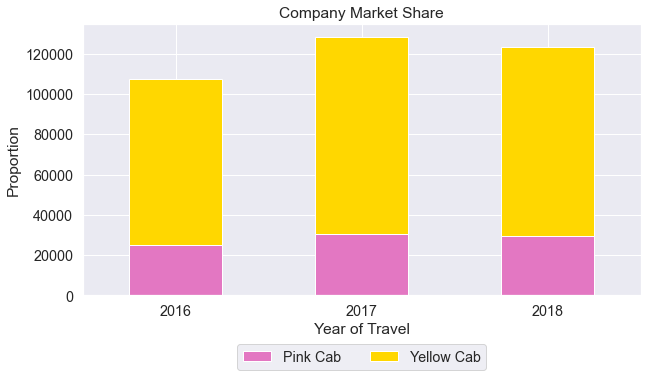

In [28]:
pd.crosstab(index = master_df['Year of Travel'], columns = master_df.Company).\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Company Yearly Market Share', color = ['tab:pink', 'gold'], 
    figsize = (10, 5), ylabel = 'Proportion').\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

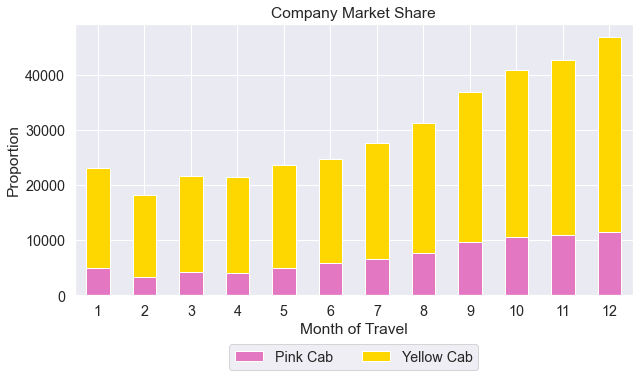

In [29]:
pd.crosstab(index = master_df['Month of Travel'], columns = master_df.Company).\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Company Monthly Market Share', color = ['tab:pink', 'gold'], 
    figsize = (10, 5), ylabel = 'Proportion').\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

In [30]:
df_date_yellow= master_df[master_df['Company'] == "Yellow Cab"]["Date of Travel"]
df_date_yellow=df_date_yellow.groupby(df_date_yellow).count()
df_date_yellow=pd.DataFrame(df_date_yellow)
df_date_yellow = df_date_yellow.rename_axis('index1').reset_index()
df_date_yellow.columns=["Date of Travel","Number of Rides"]
df_date_yellow.head()

,Date of Travel,Number of Rides
0,2016-01-02,140
1,2016-01-03,126
2,2016-01-04,21
3,2016-01-05,41
4,2016-01-06,86


In [31]:
df_date_pink= master_df[master_df['Company'] == "Pink Cab"]["Date of Travel"]
df_date_pink=df_date_pink.groupby(df_date_pink).count()
df_date_pink=pd.DataFrame(df_date_pink)
df_date_pink = df_date_pink.rename_axis('index1').reset_index()
df_date_pink.columns=["Date of Travel","Number of Rides"]
df_date_pink.head()

,Date of Travel,Number of Rides
0,2016-01-02,41
1,2016-01-03,52
2,2016-01-04,4
3,2016-01-05,6
4,2016-01-06,23


In [32]:
df_date_pink = df_date_pink.astype({"Date of Travel": str}, errors='raise')
df_date_yellow = df_date_yellow.astype({"Date of Travel": str}, errors='raise')


In [33]:
import calendar

def add_day_of_week(x): 
    x=datetime.fromisoformat(x)
    return(calendar.day_name[x.weekday()])

df_date_pink["WeekDay"]=df_date_pink["Date of Travel"].apply(add_day_of_week)

df_date_yellow["WeekDay"]=df_date_yellow["Date of Travel"].apply(add_day_of_week)
df_date_yellow.head()

,Date of Travel,Number of Rides,WeekDay
0,2016-01-02,140,Saturday
1,2016-01-03,126,Sunday
2,2016-01-04,21,Monday
3,2016-01-05,41,Tuesday
4,2016-01-06,86,Wednesday


In [34]:
df_date_pink.drop("Date of Travel", axis=1, inplace=True)
df_date_pink=df_date_pink.groupby(df_date_pink["WeekDay"]).sum()
df_date_pink=df_date_pink.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_date_pink

,Number of Rides
WeekDay,
Monday,7032
Tuesday,7077
Wednesday,7076
Thursday,9549
Friday,19249
Saturday,18253
Sunday,16475


In [35]:
df_date_yellow.drop("Date of Travel", axis=1, inplace=True)
df_date_yellow=df_date_yellow.groupby(df_date_yellow["WeekDay"]).sum()
df_date_yellow=df_date_yellow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_date_yellow

,Number of Rides
WeekDay,
Monday,22705
Tuesday,22783
Wednesday,23026
Thursday,30198
Friday,62153
Saturday,59981
Sunday,53835


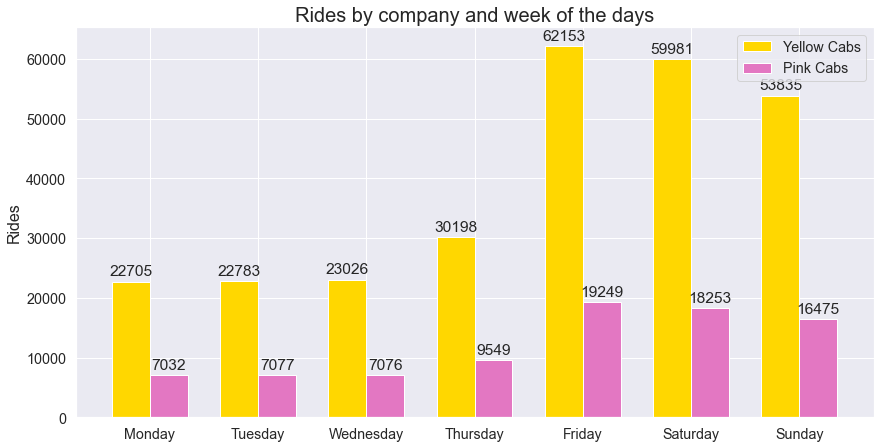

In [36]:
yellow_rides = df_date_yellow['Number of Rides'].tolist()
pink_rides = df_date_pink['Number of Rides'].tolist()

x = np.arange(7)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 6.5)
rects1 = ax.bar(x - width/2, yellow_rides, width, label='Yellow Cabs',color="gold")
rects2 = ax.bar(x + width/2, pink_rides, width, label='Pink Cabs',color="tab:pink")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rides',size=16)
ax.set_title('Company Daily Market share',size=20)
ax.set_xticks(x)

ax.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

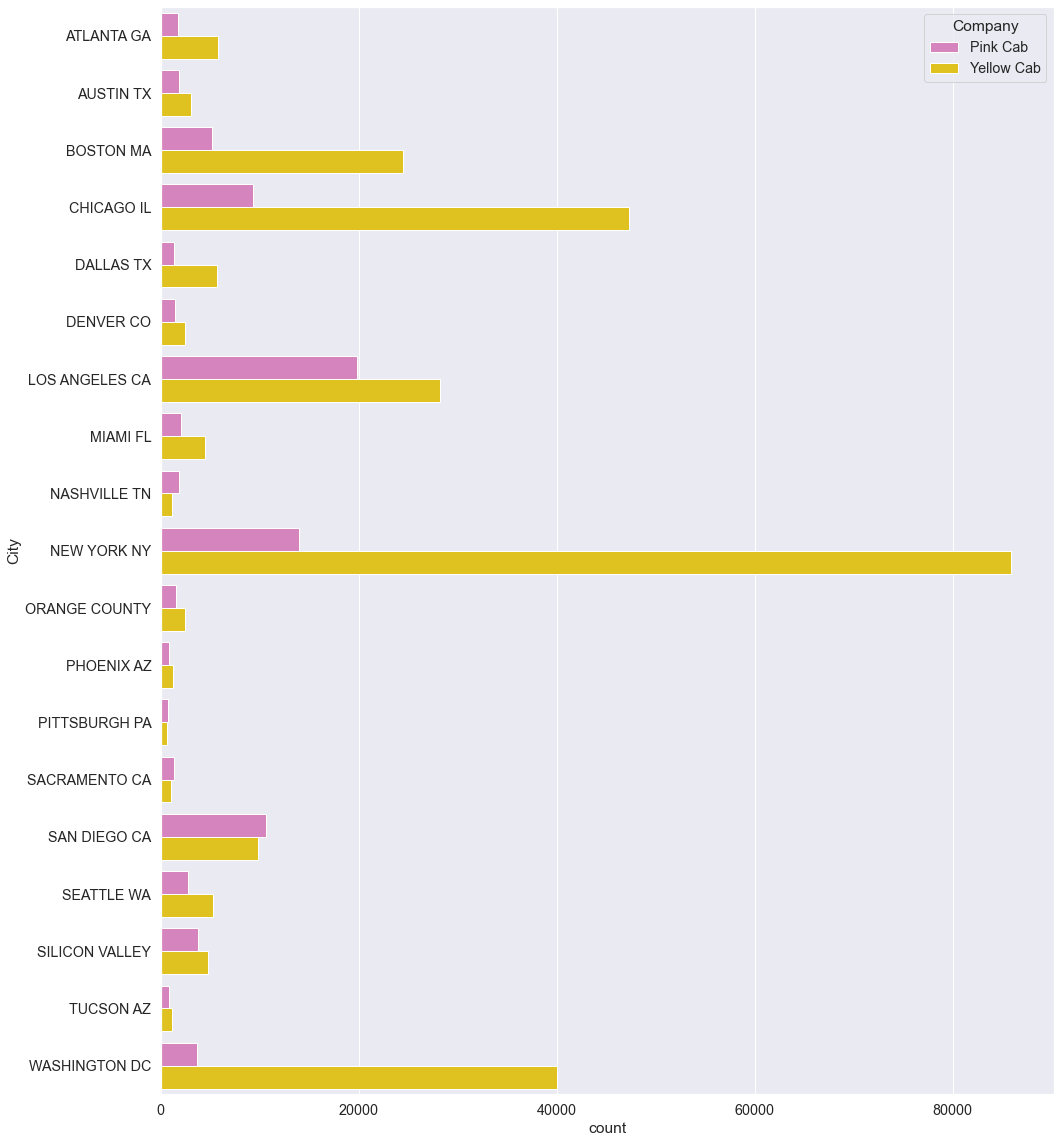

In [37]:
Compare_city = plt.subplots(figsize=(16, 20))
Compare_city = sns.countplot(y='City', hue='Company', palette=['tab:pink', 'gold'], data=master_df)
plttitle = 'Compare sity'
plt.show()

# Age Analysis

In [38]:
a1=master_df[(master_df['Age']>18) & (master_df['Age']<25)]
a2=master_df[(master_df['Age']>26) & (master_df['Age']<40)]
a3=master_df[(master_df['Age']>41) & (master_df['Age']<60)]
a4=master_df[(master_df['Age']>60)]

a11= a1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= 'Young'

a22= a2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= 'Mid_life'

a33= a3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= 'Adult'

a44= a4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= 'Senior'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])
agegroup['Total Customers']=agegroup['Total Customers'].astype(int)
agegroup.head(5)


,Company,Year of Travel,Total Customers,Class
0,Pink Cab,2016,4844,Young
1,Pink Cab,2017,6009,Young
2,Pink Cab,2018,5777,Young
3,Yellow Cab,2016,16046,Young
4,Yellow Cab,2017,19263,Young


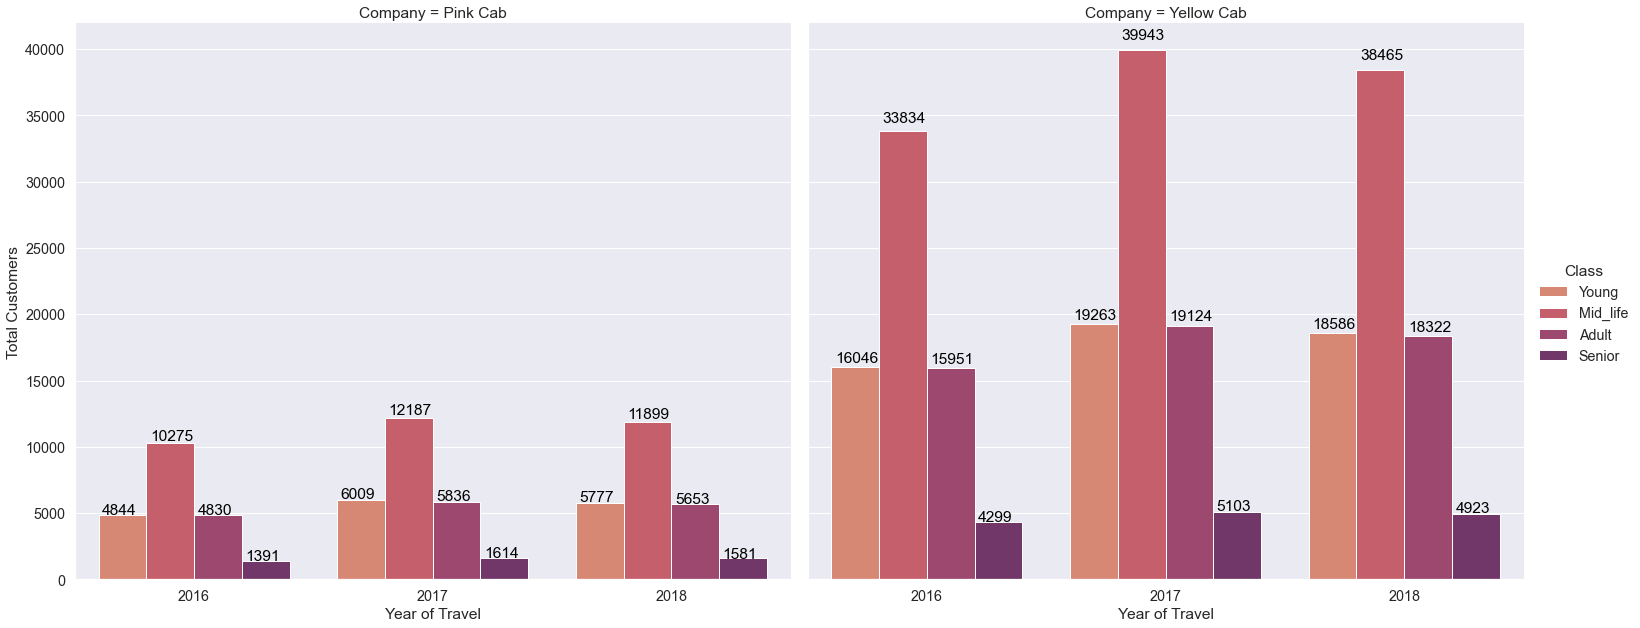

In [39]:
g=sns.catplot(x='Year of Travel',y='Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'flare', height=9, aspect=1.2)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.show()

# Payment mode Analysis

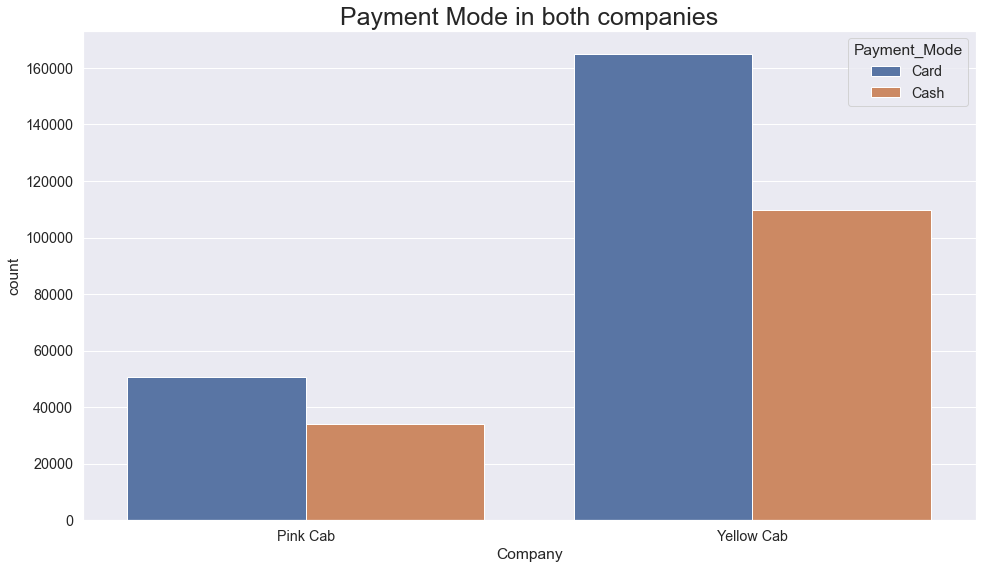

In [40]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=master_df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In [41]:
Paymode=master_df.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
Paymode.columns = ['RidesPerYear']
Paymode=Paymode.reset_index(level='Year of Travel', col_level=1)
payment=master_df.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(Paymode,on= 'Year of Travel')
payment.head()
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']
payment.head()

,Payment_Mode,Year of Travel,count,RidesPerYear,per
0,Card,2016,64339,107319,0.599512
1,Cash,2016,42980,107319,0.400488
2,Card,2017,76963,128510,0.598887
3,Cash,2017,51547,128510,0.401113
4,Card,2018,74202,123563,0.600520


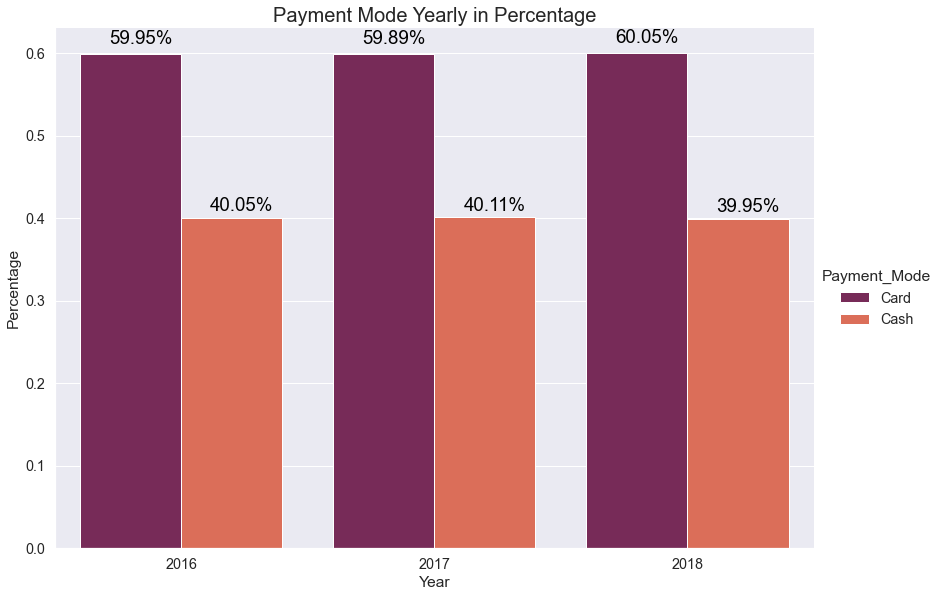

In [42]:
g=sns.catplot(x='Year of Travel',y='per',data=payment1,kind='bar',hue='Payment_Mode',palette="rocket", height=8.27, aspect=11.7/8.27)
plt.title('Payment Mode Yearly in Percentage',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')

In [43]:
pay_mode=master_df.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
pay_mode=pay_mode.reset_index(level='Year of Travel', col_level=1)
pay_mode=pay_mode.reset_index(level='Payment_Mode', col_level=1)
pay_mode=pay_mode.reset_index(level='City', col_level=1)
pay_mode = pay_mode.sort_values(by='count', ascending= False )
pay_mode.head()



,City,Payment_Mode,Year of Travel,count
47,NEW YORK NY,Card,2017,21623
85,NEW YORK NY,Card,2018,20354
9,NEW YORK NY,Card,2016,17773
66,NEW YORK NY,Cash,2017,14516
104,NEW YORK NY,Cash,2018,13748


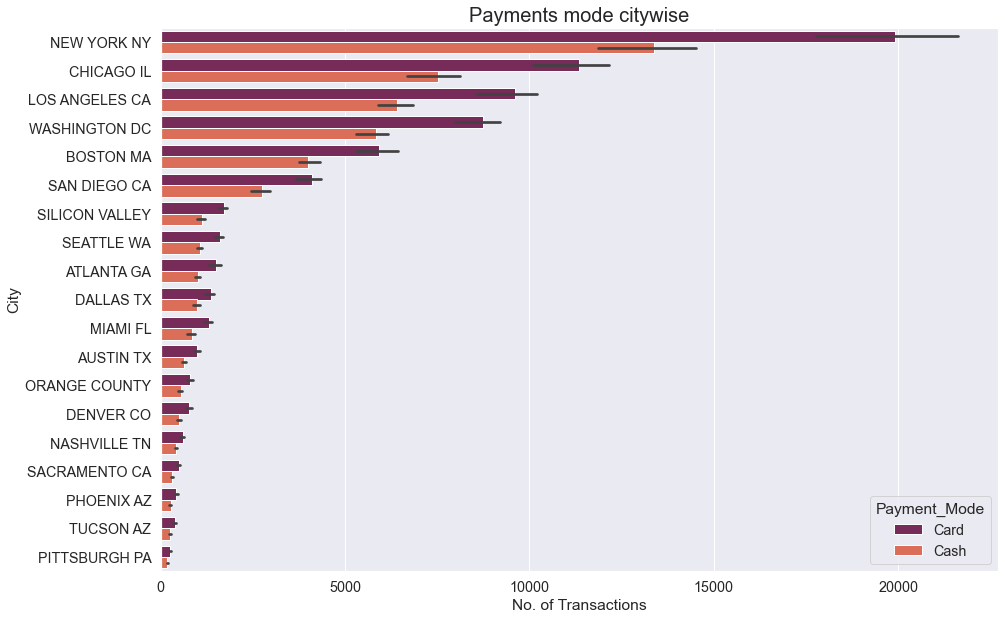

In [44]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.barplot(y='City',x='count',data=pay_mode,hue='Payment_Mode',palette="rocket")
plt.title('Payments mode citywise',fontsize=20)
plt.ylabel('City')
plt.xlabel('No. of Transactions')
plt.xticks(rotation=0)
plt.show()

In [45]:
a1=master_df[(master_df['Age']>18) & (master_df['Age']<25)]
a2=master_df[(master_df['Age']>26) & (master_df['Age']<40)]
a3=master_df[(master_df['Age']>41) & (master_df['Age']<60)]
a4=master_df[(master_df['Age']>60)]

a11= a1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a11.columns=['cash/card']
a11=a11.reset_index(level='Payment_Mode', col_level=1)
a11['Class']= 'Young'


a22= a2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a22.columns=['cash/card']
a22=a22.reset_index(level='Payment_Mode', col_level=1)
a22['Class']= 'Mid-Life'


a33= a3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a33.columns=['cash/card']
a33=a33.reset_index(level='Payment_Mode', col_level=1)
a33['Class']= 'Adult'


a44= a4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a44.columns=['cash/card']
a44=a44.reset_index(level='Payment_Mode', col_level=1)
a44['Class']= 'Seniors'

payage=a11
payage=pd.concat([payage,a22,a33,a44])
payage.head()

x=payage.groupby('Class').sum()
x.columns=['Total']
x=x.reset_index(level='Class', col_level=1)
x.head()

payage=payage.merge(x,on='Class')
payage['percentage'] = round(((payage['cash/card']/payage['Total'])*100),2)
payage.head()

,Payment_Mode,cash/card,Class,Total,percentage
0,Card,42308,Young,70525,59.99
1,Cash,28217,Young,70525,40.01
2,Card,87745,Mid-Life,146603,59.85
3,Cash,58858,Mid-Life,146603,40.15
4,Card,41843,Adult,69716,60.02


<Figure size 1080x648 with 0 Axes>

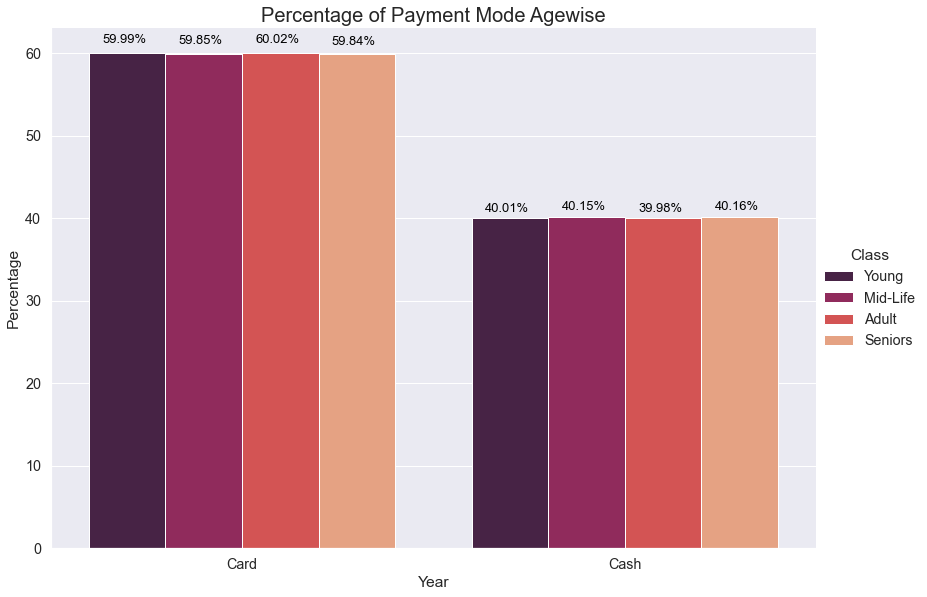

In [46]:
plt.figure(figsize=(15,9))
g=sns.catplot(x='Payment_Mode',y='percentage',data=payage,kind='bar',hue='Class', palette='rocket', height=8.27, aspect=11.7/8.27)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.035, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title('Percentage of Payment Mode Agewise',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

In [47]:
master_df.rename(columns={'Income (USD/Month)': 'Income'}, inplace = True)
master_df['income_band'] = master_df.Income.apply(lambda x: 'Poor' if x < 7500 else 'Mid_Income' if x <25000 else 'Rich')

Text(0.5, 1.0, 'Percentage Users per income')

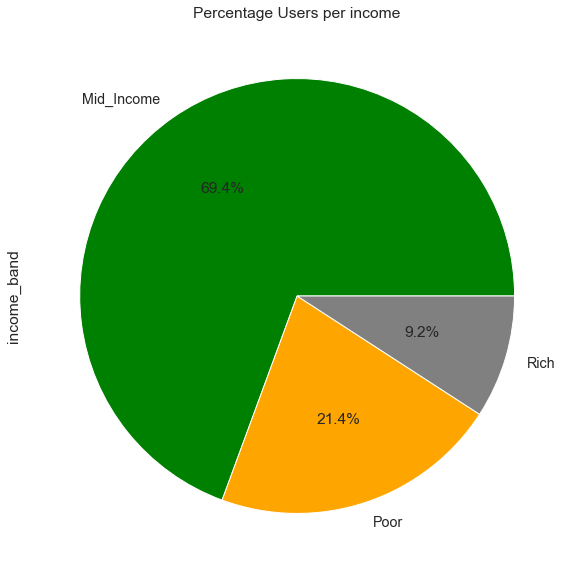

In [48]:
colors = ["green", "orange","grey"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,10))
explode=(0.4,0.05,0.05)
master_df.income_band.value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title("Percentage Users per income")

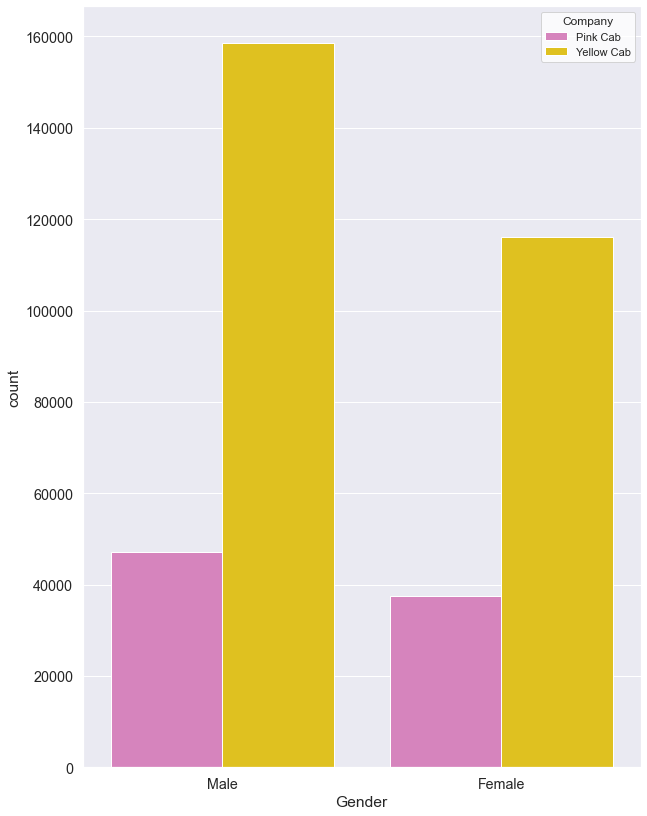

In [49]:
gender = plt.subplots(figsize=(10, 14))
sns.set(style="whitegrid")
gender = sns.countplot(x='Gender', hue='Company', palette=['tab:pink', 'gold'], data=master_df)
plt.show()

# One time users

In [50]:
unique = master_df[master_df['Customer ID'].duplicated()== False]

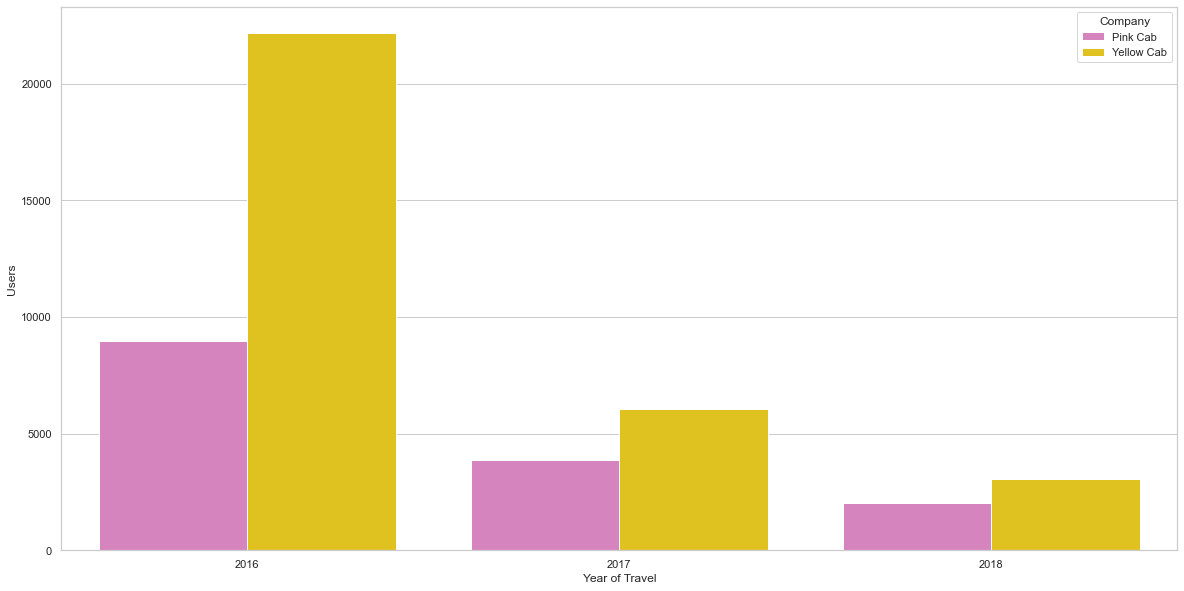

In [51]:
Yearly_one_users = unique.groupby(['Year of Travel','Company']).Users.count().reset_index()
plt.figure(figsize = [20,10])

sns.barplot(x="Year of Travel", y="Users", palette=['tab:pink', 'gold'], hue = 'Company',data=Yearly_one_users)
plt.xticks(rotation = 0);

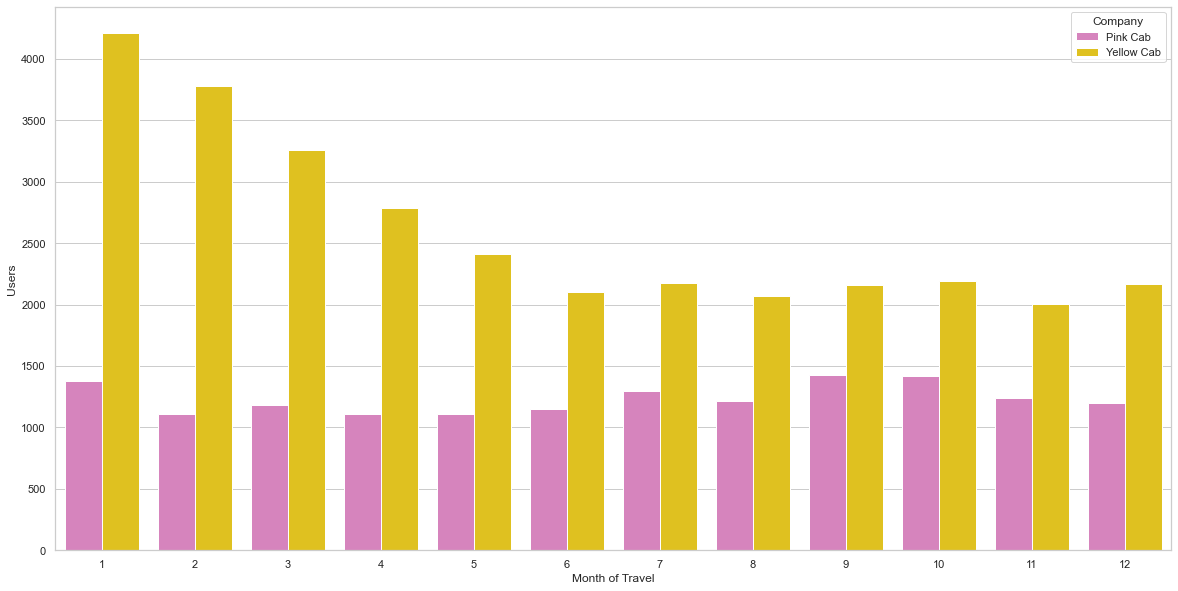

In [52]:
Monthly_one_users = unique.groupby(['Month of Travel','Company']).Users.count().reset_index()
plt.figure(figsize = [20,10])

sns.barplot(x="Month of Travel", y="Users", palette=['tab:pink', 'gold'], hue = 'Company',data=Monthly_one_users)
plt.xticks(rotation = 0);

# At least 5 times users

In [53]:
loyal_cust =master_df.groupby(['Customer ID', 'Company']).size().reset_index().rename(columns = {0:'count'})

#identifying loyal customer's that has utilized a particular Cab company atleast 5 times.
loyal_cust['is_loyal_five'] = np.where(loyal_cust['count'] >= 5, 'Loyal', 'Not Loyal')

loyal_cust

,Customer ID,Company,count,is_loyal_five
0,1,Pink Cab,4,Not Loyal
1,1,Yellow Cab,25,Loyal
2,2,Pink Cab,4,Not Loyal
3,2,Yellow Cab,36,Loyal
4,3,Pink Cab,6,Loyal
...,...,...,...,...
72221,59998,Yellow Cab,6,Loyal
72222,59999,Pink Cab,2,Not Loyal
72223,59999,Yellow Cab,6,Loyal
72224,60000,Pink Cab,4,Not Loyal


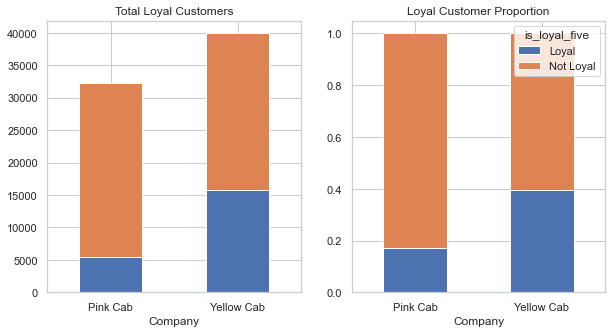

In [54]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.Company, columns = loyal_cust.is_loyal_five).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.Company, columns = loyal_cust.is_loyal_five, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

# At least 10 times users

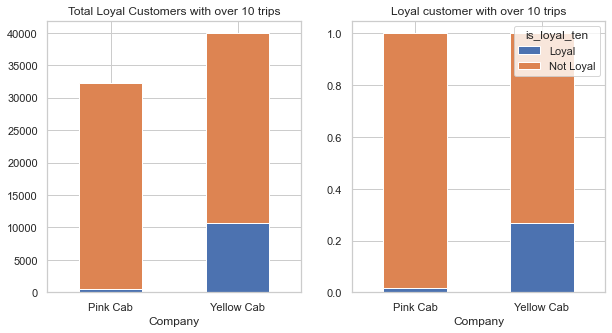

In [55]:
#identifying loyal customer's that has utilized a particular Cab company atleast 10 times.
loyal_cust['is_loyal_ten'] = np.where(loyal_cust['count'] >= 10, 'Loyal', 'Not Loyal')

fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.Company, columns = loyal_cust.is_loyal_ten).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers with over 10 trips", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.Company, columns = loyal_cust.is_loyal_ten, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal customer with over 10 trips", ax = ax[1]);

loyalty by year

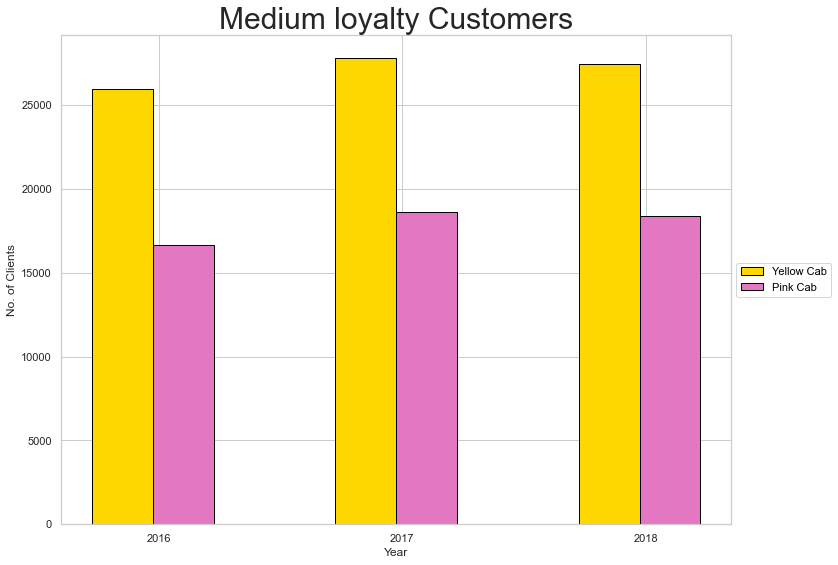

In [56]:
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=master_df[(master_df['Year of Travel']==year) & (master_df['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=master_df[(master_df['Year of Travel']==year) & (master_df['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=5]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(12,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='gold', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='tab:pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Annual loyalty Count',fontsize=30)
plt.ylabel('No. of Clients')
plt.xlabel('Year')
plt.show()

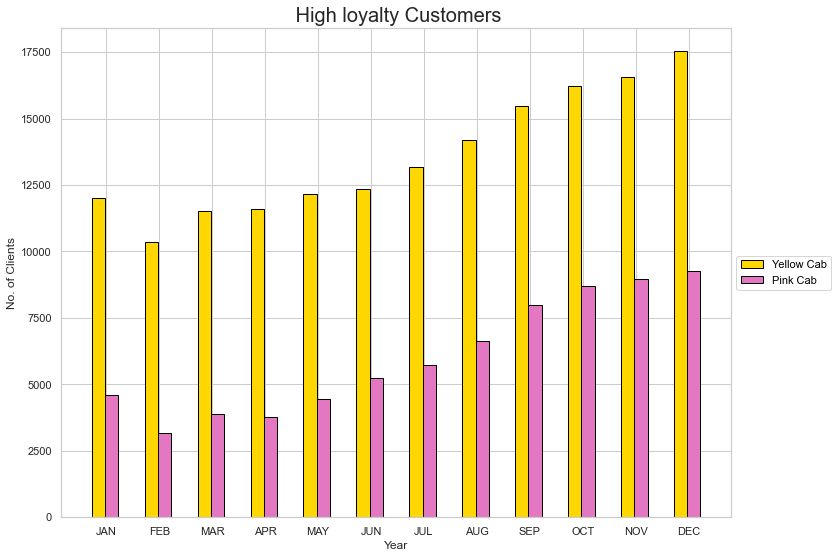

In [57]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=master_df[(master_df['Month of Travel']==month) & (master_df['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=master_df[(master_df['Month of Travel']==month) & (master_df['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(12,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='gold', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='tab:pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title(' Monthly loyalty Count',fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Year')
plt.show()

In [58]:
c10r_ym=pd.DataFrame(c10r_ym)
c10r_pm=pd.DataFrame(c10r_pm)

In [59]:
c10r_pm.columns=c10r_pm.columns=['High Loyalty Clients']
c10r_ym.columns=c10r_ym.columns=['High Loyalty Clients']

In [60]:
c10r_ym['x_index'] = c10r_ym.index
c10r_ym.head()

,High Loyalty Clients,x_index
0,12012,0
1,10371,1
2,11535,2
3,11607,3
4,12147,4


In [61]:
c10r_pm['x_index'] = c10r_pm.index
c10r_pm.head()

,High Loyalty Clients,x_index
0,4607,0
1,3176,1
2,3874,2
3,3786,3
4,4436,4


([<matplotlib.axis.XTick at 0x1c0c97632e0>,
 [Text(0.15, 0, 'JAN'),
  Text(1.15, 0, 'FEB'),
  Text(2.15, 0, 'MAR'),
  Text(3.15, 0, 'APR'),
  Text(4.15, 0, 'MAY'),
  Text(5.15, 0, 'JUN'),
  Text(6.15, 0, 'JUL'),
  Text(7.15, 0, 'AUG'),
  Text(8.15, 0, 'SEP'),
  Text(9.15, 0, 'OCT'),
  Text(10.15, 0, 'NOV'),
  Text(11.15, 0, 'DEC')])

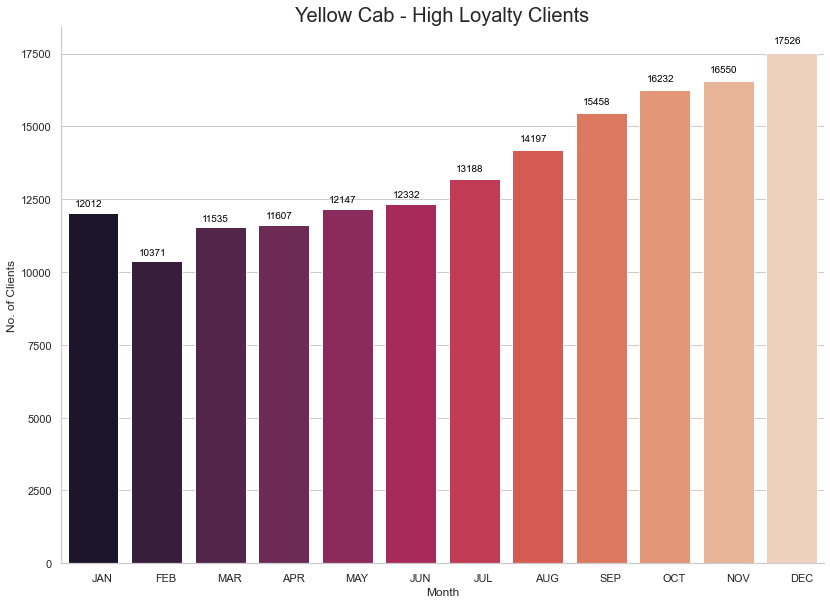

In [62]:
g=sns.catplot(x='x_index',y='High Loyalty Clients',data=c10r_ym,kind='bar',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Yellow Cab - High Loyalty Clients",fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])

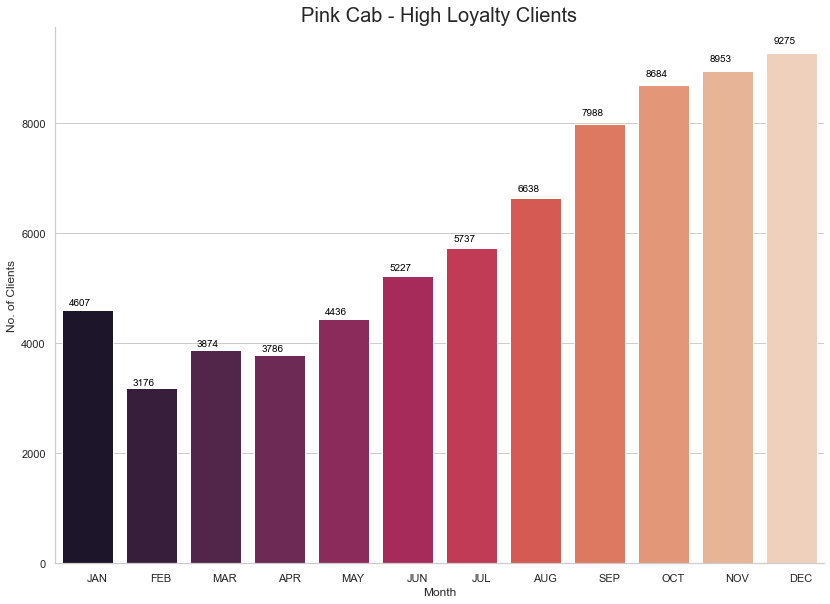

In [63]:
g=sns.catplot(x= 'x_index',y='High Loyalty Clients',data=c10r_pm,kind='bar',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='small')
plt.title("Pink Cab - High Loyalty Clients",fontsize=20)
plt.ylabel('No. of Clients')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

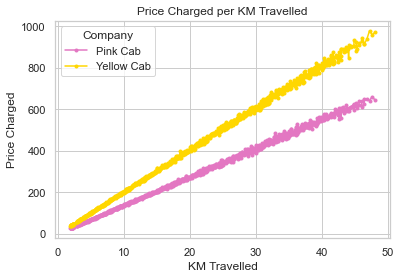

In [64]:
yearsales=pd.pivot_table(master_df,index='KM Travelled',columns='Company' ,values='Price Charged')
yearsales.plot(marker='.', color=['tab:pink', 'gold'])
plt.ylabel('Price Charged')
plt.title('Price Charged per KM Travelled')
plt.show()

Profit Analysis

In [65]:
Profit_=master_df.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
Profit_.head()

Profit
Company    Year of Travel              
Pink Cab   2016            1.713511e+06
           2017            2.033655e+06
           2018            1.560162e+06
Yellow Cab 2016            1.392700e+07
           2017            1.657598e+07

In [66]:
Profit_month=master_df.groupby(['Company', 'Month of Travel']).Profit.sum().to_frame('Profit')
Profit_month.head()

Profit
Company  Month of Travel            
Pink Cab 1                388054.602
         2                252041.309
         3                299096.571
         4                245818.095
         5                168613.914

In [67]:
Price_=master_df.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')
Price_.head()

Price
Company    Year of Travel             
Pink Cab   2016             7908479.23
           2017             9578629.54
           2018             8841142.56
Yellow Cab 2016            38481133.18
           2017            45818910.04

In [68]:
Price_month=master_df.groupby(['Company', 'Month of Travel'])['Price Charged'].sum().to_frame('Price')
Price_month.head()

Price
Company  Month of Travel            
Pink Cab 1                1638294.62
         2                1089685.63
         3                1367533.76
         4                1257084.99
         5                1393308.68

In [69]:
Price_['%Profit'] =(Profit_['Profit']*100) /Price_['Price']
Price_.head(6)

Price    %Profit
Company    Year of Travel                        
Pink Cab   2016             7908479.23  21.666760
           2017             9578629.54  21.231168
           2018             8841142.56  17.646613
Yellow Cab 2016            38481133.18  36.191750
           2017            45818910.04  36.177155
           2018            41553843.97  32.529842

In [70]:
Price_month['%Profit'] =(Profit_month['Profit']*100) /Price_month['Price']
Price_month.head(6)

Price    %Profit
Company  Month of Travel                       
Pink Cab 1                1638294.62  23.686497
         2                1089685.63  23.129727
         3                1367533.76  21.871239
         4                1257084.99  19.554612
         5                1393308.68  12.101691
         6                1703511.10  13.660917

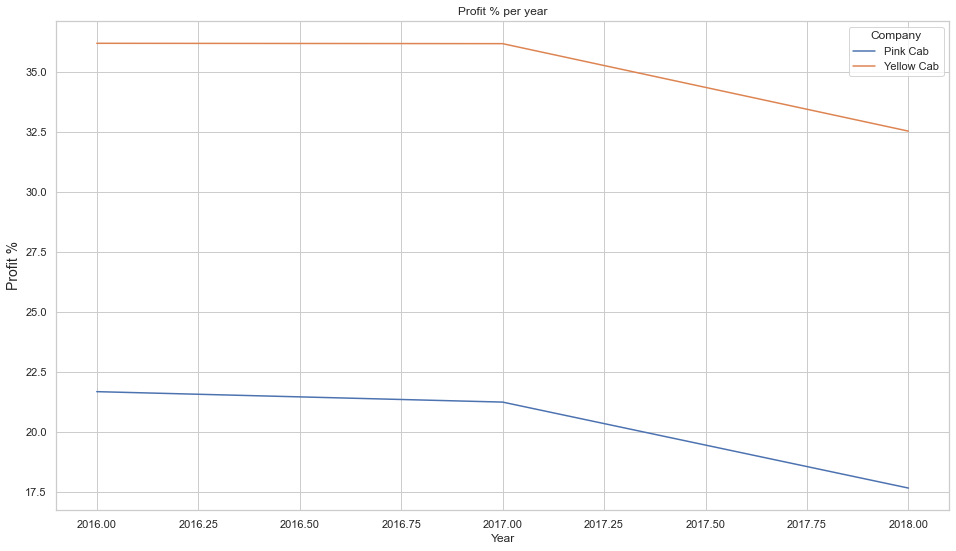

In [71]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year of Travel', y='%Profit', hue="Company", data=Price_)
plt.xlabel("Year", size=12)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

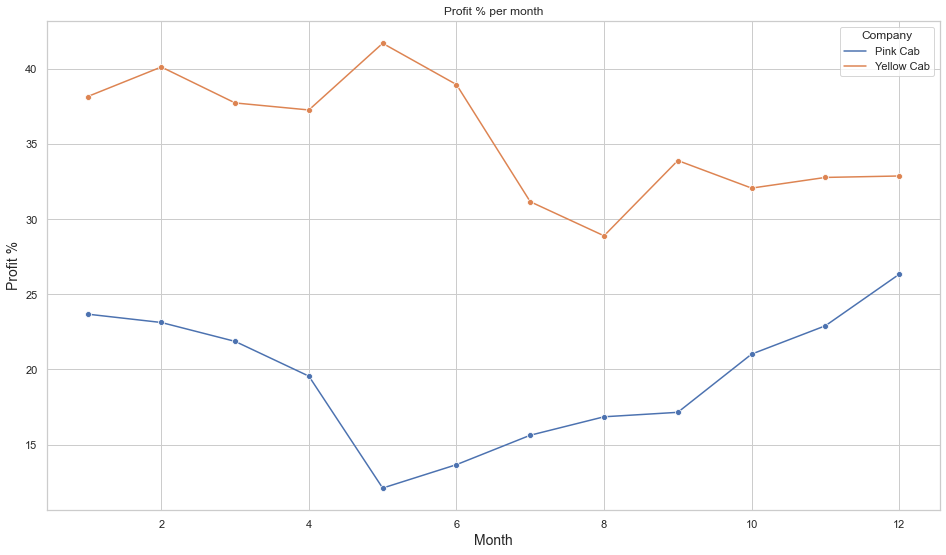

In [72]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month of Travel', y='%Profit', hue="Company", data=Price_month, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

In [114]:
dpm=master_df.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
dpm=dpm.reset_index(level='Month of Travel')
dpm=dpm.reset_index(level='Company')
dpm.head()

,Company,Month of Travel,Profit
0,Pink Cab,1,388054.602
1,Pink Cab,2,252041.309
2,Pink Cab,3,299096.571
3,Pink Cab,4,245818.095
4,Pink Cab,5,168613.914


In [115]:
y=yellow_cab_st.Profit.resample('m').sum().to_frame('Profit')
p=pink_cab_st.Profit.resample('m').sum().to_frame('Profit')

In [73]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=16)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()

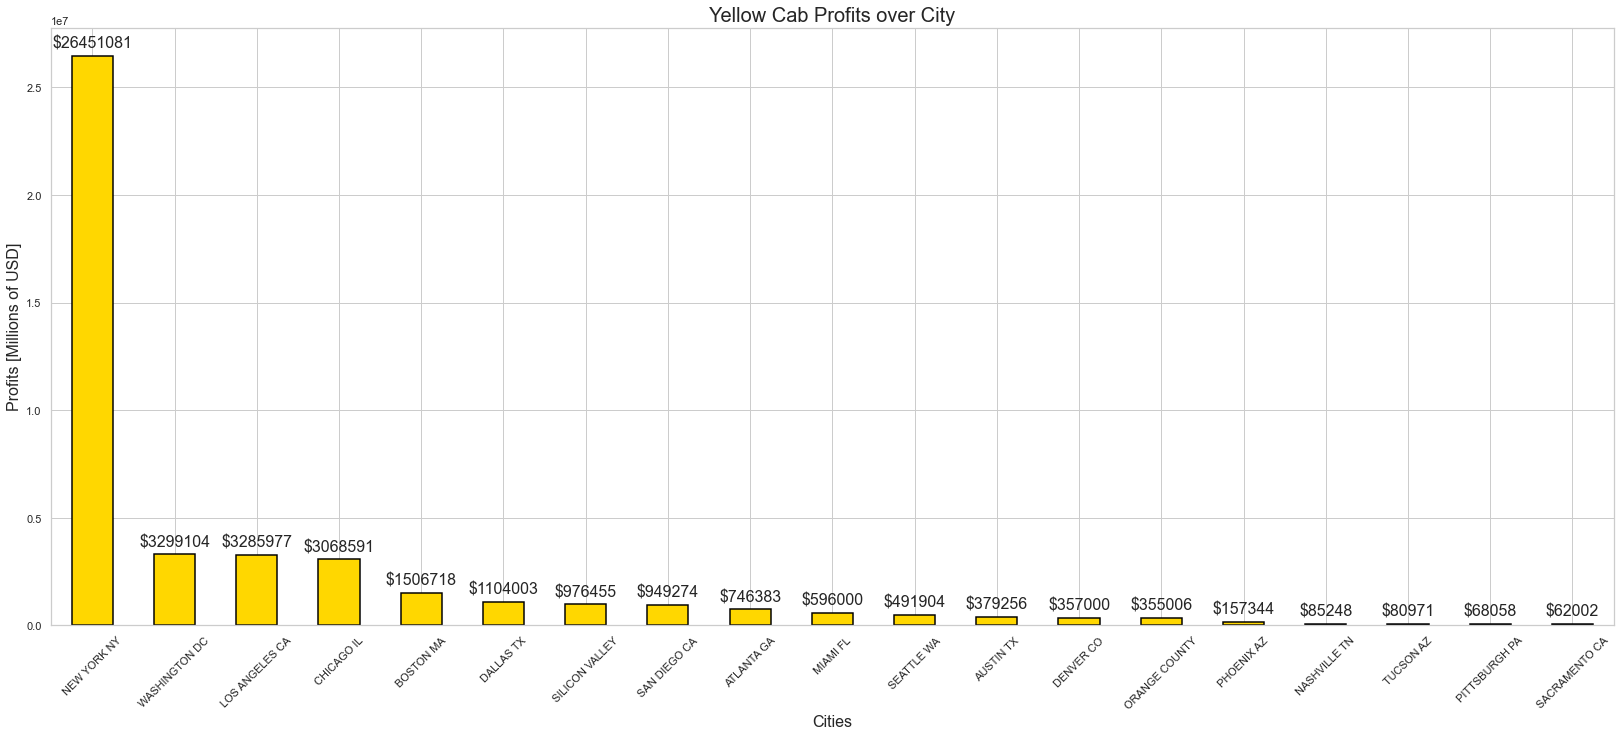

In [74]:
ppc= yellow_cab_st.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(28,11))
fig= ppc.Profit.plot.bar(color = 'gold',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
add_value_labels(fig)

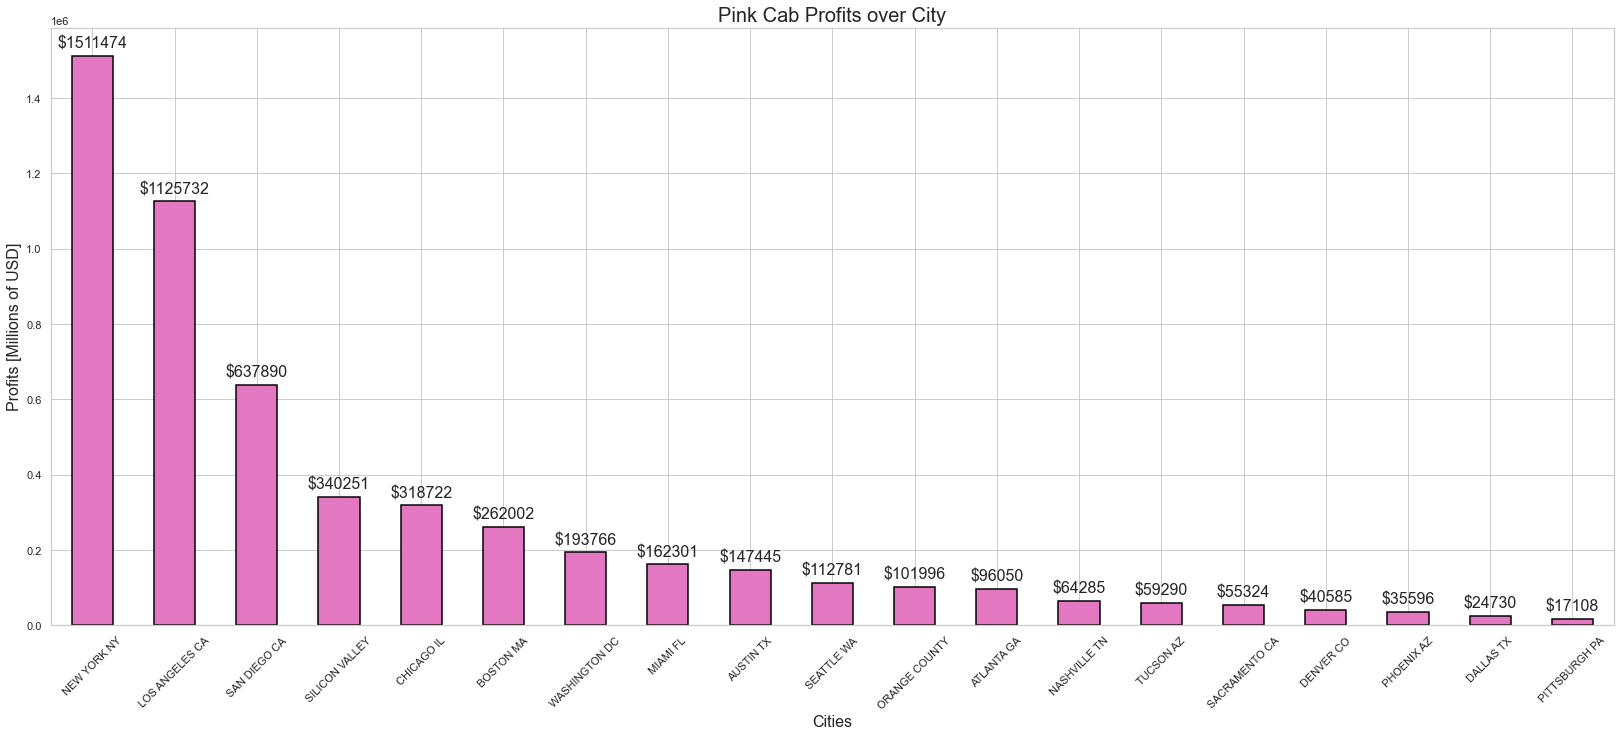

In [75]:
pink_city_profit= pink_cab_st.groupby('City').Profit.sum()
pink_city_profit= pd.DataFrame(pink_city_profit)
pink_city_profit = pink_city_profit.sort_values(by='Profit', ascending= False )
pink_city_profit.head()

plt.figure(figsize=(28,11))
fig= pink_city_profit.Profit.plot.bar(color = 'tab:pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
add_value_labels(fig)

In [76]:
h=master_df.groupby(['Company','City']).Profit.sum().to_frame('Profit Over City')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='Profit Over City', ascending= False )

In [77]:
h=h.drop([28,9],axis=0)
h.head()

,Company,City,Profit Over City
37,Yellow Cab,WASHINGTON DC,3.299104e+06
25,Yellow Cab,LOS ANGELES CA,3.285977e+06
22,Yellow Cab,CHICAGO IL,3.068591e+06
21,Yellow Cab,BOSTON MA,1.506718e+06
6,Pink Cab,LOS ANGELES CA,1.125732e+06


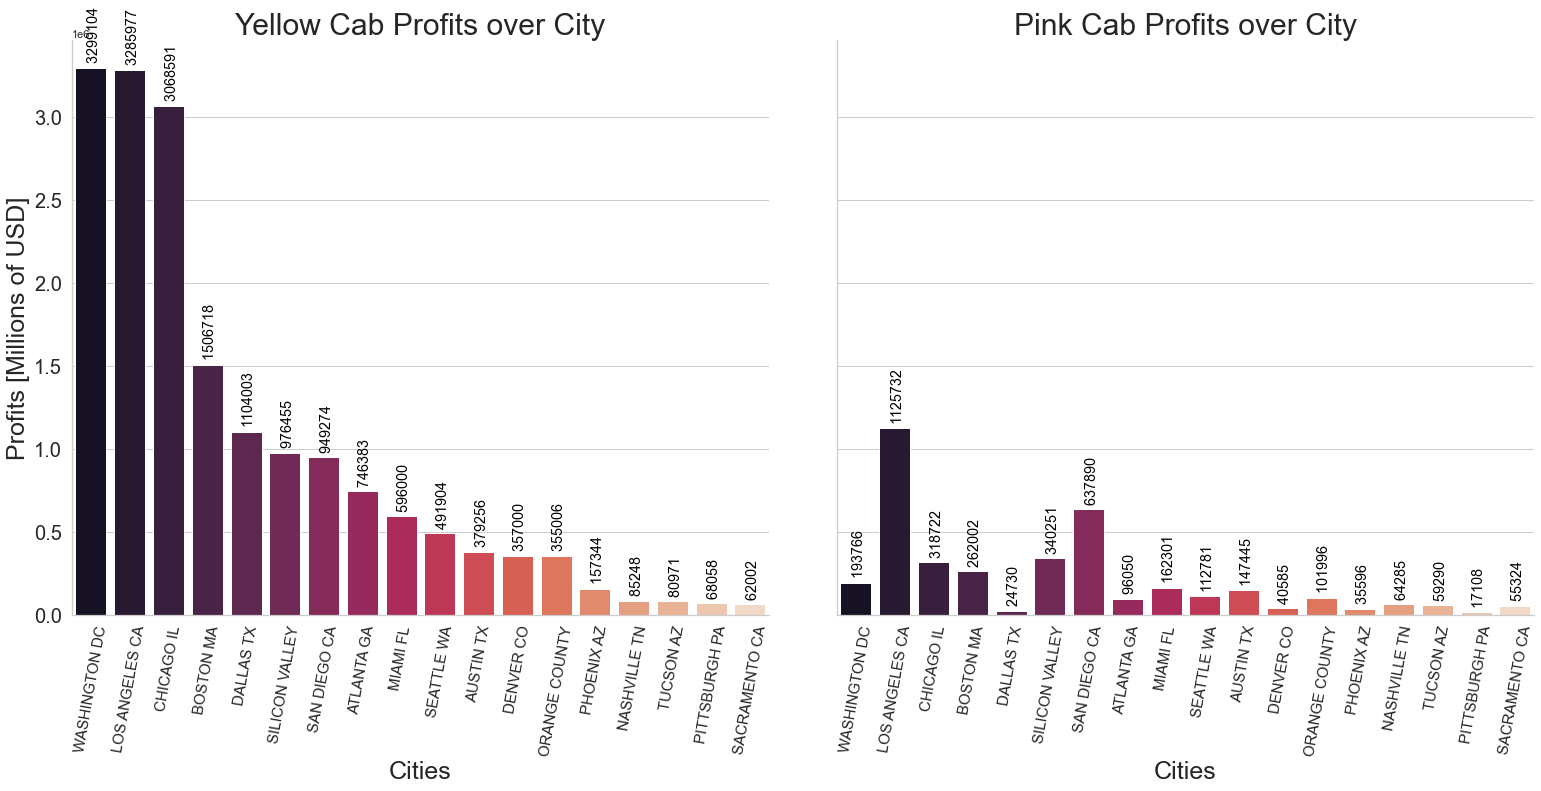

In [78]:
g=sns.catplot(x='City',y='Profit Over City',data=h,kind='bar',palette = 'rocket',col='Company', height=9, aspect=1.2)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.3, 
            p.get_height(), 
            "  {:.0f}".format(p.get_height()), 
            color='black', rotation='vertical', size='large')
plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Yellow Cab Profits over City',fontsize=30)
plt.xticks(rotation=80,fontsize=15)
plt.yticks(rotation=0,fontsize=20)
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.3, 
            p.get_height(), 
            "  {:.0f}".format(p.get_height()), 
            color='black', rotation='vertical', size='large')
plt.ylabel('Profits [Millions of USD]', fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.title('Pink Cab Profits over City',fontsize=30)
plt.xticks(rotation=80,fontsize=15)
plt.yticks(rotation=0,fontsize=20)
plt.show()

# Loss Analysis

In [79]:
loss = master_df.query("Profit <= 0")
loss

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income,Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit,income_band
39,10031719,28533,Card,2016-05-13,Pink Cab,ATLANTA GA,4.28,40.49,51.3600,Male,39,28386,814885.0,24701.0,2016,5,13,-10.8700,Rich
42,10347704,29039,Cash,2018-07-12,Pink Cab,ATLANTA GA,2.36,24.83,25.0160,Male,35,17761,814885.0,24701.0,2018,7,12,-0.1860,Mid_Income
45,10266097,28102,Cash,2017-11-26,Pink Cab,ATLANTA GA,25.52,283.26,293.4800,Male,39,14181,814885.0,24701.0,2017,11,26,-10.2200,Mid_Income
47,10319969,29494,Card,2018-04-17,Pink Cab,ATLANTA GA,11.10,108.44,120.9900,Male,28,5644,814885.0,24701.0,2018,4,17,-12.5500,Poor
59,10136342,29599,Card,2017-01-10,Pink Cab,ATLANTA GA,5.70,46.79,61.5600,Male,27,12948,814885.0,24701.0,2017,1,10,-14.7700,Mid_Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359299,10407212,51880,Card,2018-11-12,Yellow Cab,WASHINGTON DC,6.90,92.67,92.7360,Female,59,22853,418859.0,127001.0,2018,11,12,-0.0660,Mid_Income
359310,10218074,52158,Card,2017-09-02,Yellow Cab,WASHINGTON DC,5.50,68.35,70.6200,Female,59,19249,418859.0,127001.0,2017,9,2,-2.2700,Mid_Income
359354,10395329,51257,Cash,2018-10-21,Yellow Cab,WASHINGTON DC,38.61,537.94,542.0844,Male,39,15247,418859.0,127001.0,2018,10,21,-4.1444,Mid_Income
359389,10347676,51406,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,Female,29,6829,418859.0,127001.0,2018,7,6,-5.8540,Poor


In [80]:
print(loss.shape)

(24823, 19)


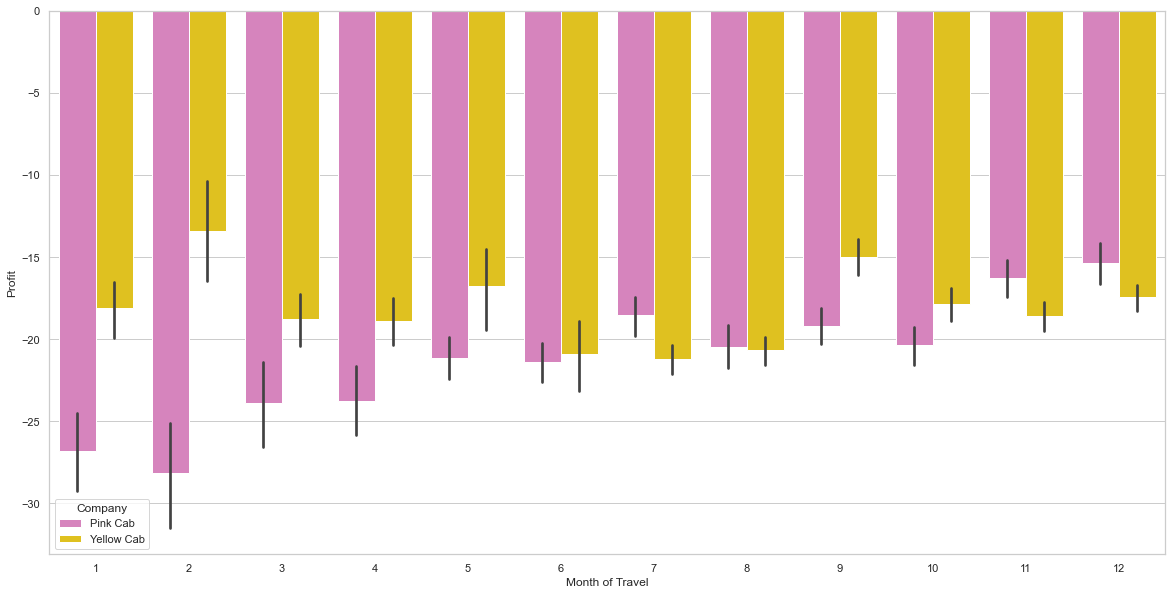

In [81]:
plt.figure(figsize = [20,10])

sns.barplot(x="Month of Travel", y="Profit", palette=['tab:pink', 'gold'], hue = 'Company',data=loss)
plt.xticks(rotation = 0)
add_value_labels(fig);


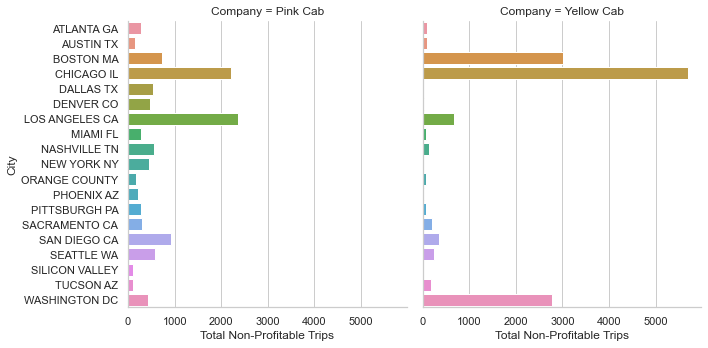

In [82]:
loss_city = loss.groupby(['City', 'Company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'City', x = 'count', col = 'Company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Trips");

In [120]:
data_corr = master_df.corr()
data_corr

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income,Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Transaction ID,1.000000,-0.016912,-0.001429,-0.052902,-0.003462,-0.001267,-0.001570,0.023868,0.013526,0.941600,0.287009,0.012021,-0.087130
Customer ID,-0.016912,1.000000,0.000389,-0.177324,0.003077,-0.004735,-0.013608,-0.647052,-0.610742,-0.002539,-0.044656,0.000650,-0.306527
KM Travelled,-0.001429,0.000389,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.002311,-0.000428,-0.001072,-0.001903,0.001652,0.462768
Price Charged,-0.052902,-0.177324,0.835753,1.000000,0.859812,-0.003084,0.003228,0.326589,0.281061,-0.036409,-0.061116,-0.004021,0.864154
Cost of Trip,-0.003462,0.003077,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.015108,0.023628,-0.001773,-0.008370,0.002091,0.486056
Age,-0.001267,-0.004735,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.009002,-0.005906,-0.000579,-0.002226,-0.001275,-0.005093
Income,-0.001570,-0.013608,-0.000544,0.003228,-0.000633,0.003907,1.000000,0.011868,0.010464,-0.001617,0.000322,0.001860,0.006148
Population,0.023868,-0.647052,-0.002311,0.326589,0.015108,-0.009002,0.011868,1.000000,0.915490,0.000003,0.064571,0.000970,0.544079
Users,0.013526,-0.610742,-0.000428,0.281061,0.023628,-0.005906,0.010464,0.915490,1.000000,-0.000771,0.036558,0.000514,0.457758
Year of Travel,0.941600,-0.002539,-0.001072,-0.036409,-0.001773,-0.000579,-0.001617,0.000003,-0.000771,1.000000,-0.030490,-0.020995,-0.060567


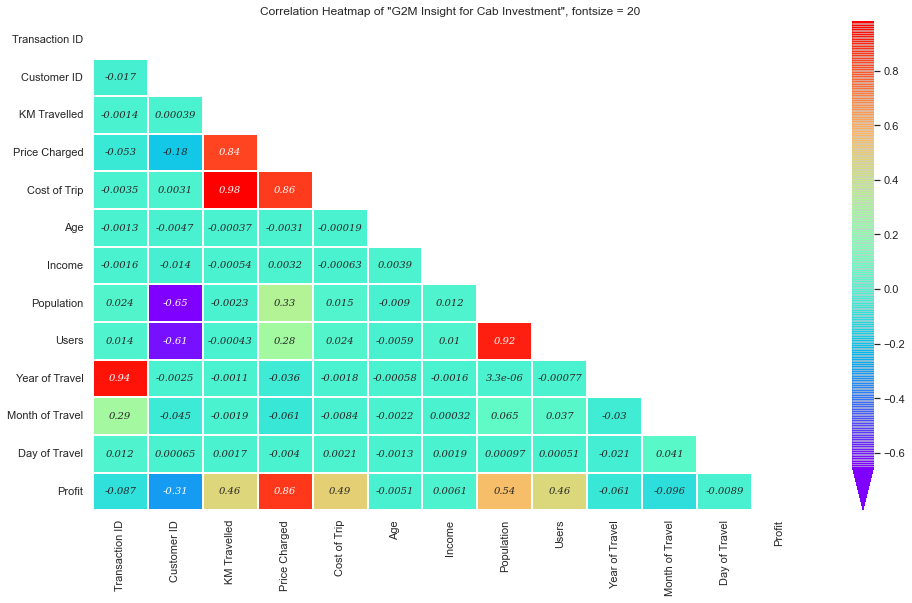

In [121]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

Following my analysis of the data provided, I suggest the investor 'Xyz' invest in Yellow Cab Co due to the following concerns:

1. Demand Analysis: 
    There is a greater coverage of cities and more loyalty among yellow cab customers than with pink cabs. 
2. Profit and Loss Analysis:
    In addition, Yellow Cab made more profit than Pink Cab as well as had fewer fluctuations in profit. Yellow cab also had minimal loss in most cities except 3 cities when compared to the Pink cab company.
    
    
In general, both businesses need a lot of work, but yellow cab is suggested if xyz company's primary objective is profit.